In [12]:
from PIL import Image, ImageDraw
import random
import json
import pandas as pd


def random_color():

    return (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255), 125)


def visualize_polygons(polygons, img_path):

    # load the image
    image = Image.open(img_path)
    draw = ImageDraw.Draw(image, 'RGBA')

    label_to_color = {i: random_color() for i in range(len(polygons))}

    # draw polygons
    for i, polygon in enumerate(polygons):
        # print(polygon)
        color = label_to_color[i]
        draw.polygon(list(zip(polygon[0], polygon[1])), outline=(0,255,0,128), fill=(0,255,0,128))

    return image


def visualize_crop(map_path, left_x, right_x, top_y, bottom_y):

    map_img = Image.open(map_path)
    width, height = map_img.size
    print("full map is " + str(width) + " pixels wide by " + str(height) + " pixels high.\n displaying crop:")
    display(map_img.crop((left_x, top_y, right_x, bottom_y, )))

In [3]:
!pip show Pillow

Name: Pillow
Version: 10.0.1
Summary: Python Imaging Library (Fork)
Home-page: https://python-pillow.org
Author: Jeffrey A. Clark (Alex)
Author-email: aclark@aclark.net
License: HPND
Location: d:\anaconda3\envs\ada\lib\site-packages
Requires: 
Required-by: bokeh, matplotlib


In [25]:
vandevelde_path = 'raw_maps_20231024/1846_vandevelde/vandevelde_1846.jpeg'
saunders_path = 'raw_maps_20231024/1874_saunders/saunders_1874.jpeg'
kiepart_path = 'raw_maps_20231024/1845_kiepert/kiepert_1845.jpeg'

vandevelde_json_path = 'annotation/vandevelde_1846.json'
saunders_json_path = 'dependencies/ground_truth_labels/saunders_1874.json'
kiepart_json_path = 'dependencies/ground_truth_labels/kiepert_1845.json'

with open(kiepart_json_path, 'r', encoding='utf-8') as f:

    gt_labels_tmp = json.load(f)
    p_coords = []
    for obs in gt_labels_tmp[list(gt_labels_tmp.keys())[0]]['regions']:
        x = obs['shape_attributes']['all_points_x']
        y = obs['shape_attributes']['all_points_y']
        p_coords.append([x,y])
    # print(p_coords)
    img = visualize_polygons(p_coords, kiepart_path)
#     img.show()
    img.save("annotation/kiepart_annotation.jpg")

full map is 6529 pixels wide by 8695 pixels high.
 displaying crop:


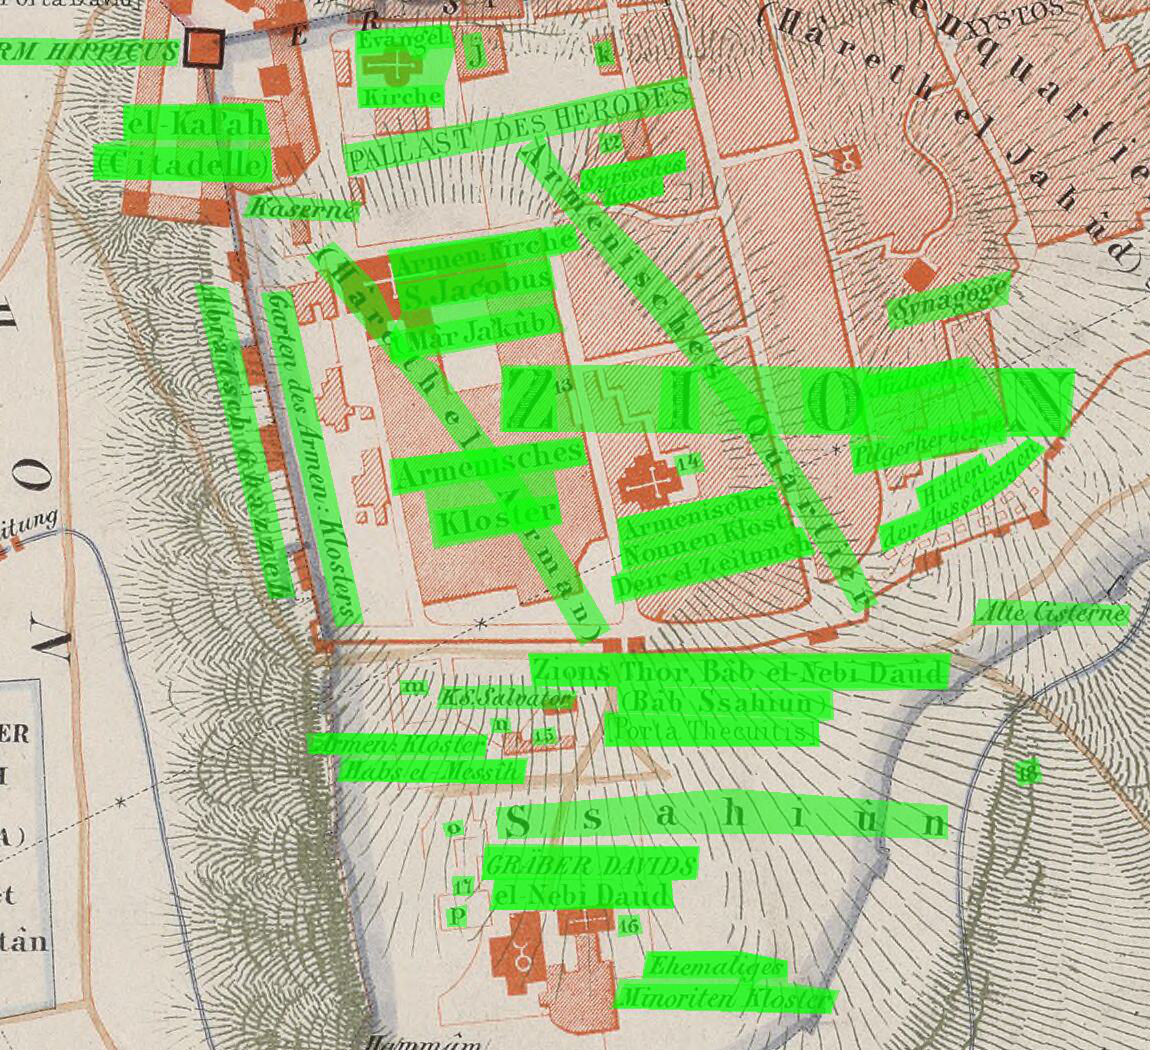

In [26]:
vandevelde_label_path = 'annotation/vandevelde_annotation.jpg'
saunders_label_path = 'annotation/saunders_annotation.jpg'
kiepart_label_path = 'annotation/kiepart_annotation.jpg'
# kiepert_output_path = 'processed/strec/kiepert_1845/output.png'

left_x = 2400
right_x = 3550
top_y = 4800
bottom_y = 5850

visualize_crop(kiepart_label_path, left_x, right_x, top_y, bottom_y)

In [24]:
saunders_patches = [{'left_x': 3150, 'right_x': 4150, 'top_y': 2250, 'bottom_y': 3250},
                    {'left_x': 6750, 'right_x': 7750, 'top_y': 2250, 'bottom_y': 3250},
                    {'left_x': 5400, 'right_x': 6400, 'top_y': 4500, 'bottom_y': 5500},
                    {'left_x': 7650, 'right_x': 8650, 'top_y': 5400, 'bottom_y': 6400},
                    {'left_x': 7650, 'right_x': 8650, 'top_y': 3150, 'bottom_y': 4150}]

kiepert_patches = [{'left_x': 2400, 'right_x': 3550, 'top_y': 4800, 'bottom_y': 5850}]

vandevelde_patches = [{'left_x': 3000, 'right_x': 4600, 'top_y': 1450, 'bottom_y': 3750}]

In [25]:
!pip install autocorrect

     -------------------------------------- 622.8/622.8 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622375 sha256=cc87b145dba87a6f0530c8d33317d7b87a3373caf162e56060b643146060c466
  Stored in directory: c:\users\theodore\appdata\local\pip\cache\wheels\72\b8\3b\a90246d13090e85394a8a44b78c8abf577c0766f29d6543c75
Successfully built autocorrect


In [3]:
from autocorrect import Speller
spell = Speller()
spell("street of the smits")

'street of the smith'

# packages in environment at D:\anaconda3\envs\fdh:
#
# Name                    Version                   Build  Channel
autocorrect               2.6.1                    pypi_0    pypi
